<a href="https://colab.research.google.com/github/arghaboksi/Bunch-of-monsters/blob/master/CS6910_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qqq
import wandb

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 180 kB 45.3 MB/s 
     |████████████████████████████████| 143 kB 43.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 


In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
#wandb.login()

In [3]:
#fashion mnist data 
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
#training data and test data
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(training_images.shape)     #60k training images
print(training_labels.shape)     
print(test_images.shape)         #10k test images
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
#Flattening the training and test examples
#Each column is a flattened image
training_images_flatten = training_images.reshape(training_images.shape[0], -1).T
print(training_images_flatten.shape)
test_images_flatten = test_images.reshape(test_images.shape[0], -1).T
print(test_images_flatten.shape)

# Standardize data
train_data = training_images_flatten/255
test_data = test_images_flatten/255
print("train data shape : ", train_data.shape)
print("test data shape : ", test_data.shape)

(784, 60000)
(784, 10000)
train data shape :  (784, 60000)
test data shape :  (784, 10000)


In [7]:
#One hot Encoding for labels
train_labels = np.transpose(to_categorical(training_labels))
testing_labels = np.transpose(to_categorical(test_labels))
print(train_labels.shape)
print(testing_labels.shape)

(10, 60000)
(10, 10000)


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4


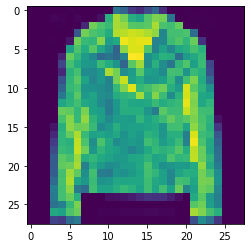

In [ ]:
print(train_labels[:, 205])
plt.imshow(training_images[205])
print(test_labels[205])

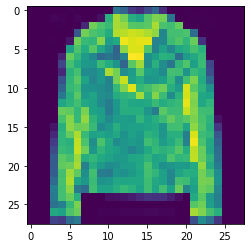

In [ ]:
plt.imshow(training_images_flatten[:, 205].reshape(28,28))

0
1
2
3
4
5
6
7
8
9


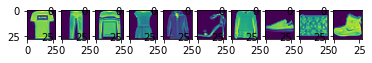

In [8]:
# Question 1
labels = [0,1,2,3,4,5,6,7,8,9]
for k in labels:
    for j in range(len(training_labels)):
        if k == training_labels[j]:
            plt.subplot(1,10,k+1)
            plt.imshow(training_images[j])
            print(training_labels[j])
            break 

In [9]:
# L : a list containing no. of neurons in different layers, L = [4,4,2] means 4 input neurons, one hidden layer with 4 neurons, 2 output neurons
# params : a dictionary containing weights and biases of different layers
def parameter_initialise(L):
    no_of_layers = len(L)
    params = {}
    for i in range(1, no_of_layers):
        params['W' + str(i)] = np.random.randn(L[i], L[i-1]) * 0.01
        params['b' + str(i)] = np.zeros((L[i], 1))
    return params

In [12]:
parameters = parameter_initialise([2,2,2,2])

In [13]:
print(parameters)
print(np.shape(parameters['W1']))
print(np.shape(parameters['b1']))
print(np.shape(parameters['W2']))
print(np.shape(parameters['b2']))

{'W1': array([[ 0.00923845,  0.00561889],
       [-0.0045    , -0.01296   ]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[0.00963643, 0.01288594],
       [0.01193543, 0.01284223]]), 'b2': array([[0.],
       [0.]]), 'W3': array([[-0.00438682,  0.00818998],
       [-0.00584567,  0.0124887 ]]), 'b3': array([[0.],
       [0.]])}
(2, 2)
(2, 1)
(2, 2)
(2, 1)


In [20]:
# Linear Computation of a layer
def linear_computation_of_a_layer(activations_prev_layer, weights_of_current_layer, biases_of_current_layer):
    preactivation = np.dot(weights_of_current_layer, activations_prev_layer) + biases_of_current_layer
    return preactivation

In [13]:
# Relu activation function
def relu(v):
    return np.maximum(0,v)

In [15]:
relu(np.array([[-0.5],[3], [0], [-5]]))

array([[0.],
       [3.],
       [0.],
       [0.]])

In [14]:
# Sigmoid activation function
def sigmoid(v):
    return 1/(1+np.exp(-v))

In [ ]:
sigmoid(np.zeros((4,1)))

array([[0.5],
       [0.5],
       [0.5],
       [0.5]])

In [15]:
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()

In [17]:
softmax(np.array([[1], [3], [2]]))

array([[0.09003057],
       [0.66524096],
       [0.24472847]])

In [25]:
softmax(np.array([[-0.080567926], [0.029642017], [0.197543229]]))

array([[0.2909391 ],
       [0.32483713],
       [0.38422377]])

In [28]:
# activation of a layer
def activation_of_a_layer(activations_prev_layer, weights_of_current_layer, biases_of_current_layer):
    preactivation = linear_computation_of_a_layer(activations_prev_layer, weights_of_current_layer, biases_of_current_layer)
    activation = sigmoid(preactivation)
    return preactivation, activation

In [40]:
# Forward propagation for a single training example
def forward_propagation(input_vector, parameters):
    activation_preactivation_dictionary = {}
    activation = input_vector
    L = len(parameters)//2     
    for i in range(1, L):      #calculates activation of L-1 layers
        A_temp = activation
        preactivation, activation = activation_of_a_layer(A_temp, parameters['W'+str(i)], parameters['b'+str(i)])
        activation_preactivation_dictionary['a'+str(i)] = preactivation
        activation_preactivation_dictionary['h'+str(i)] = activation
    #Output layer is softmax, need to write the softmax code here
    preactivation = linear_computation_of_a_layer(activation, parameters['W'+str(L)], parameters['b'+str(L)])
    output_layer_activation = softmax(preactivation)
    activation_preactivation_dictionary['a'+str(L)] = preactivation
    activation_preactivation_dictionary['h'+str(L)] = output_layer_activation
    return output_layer_activation, activation_preactivation_dictionary

In [42]:
parameters = {'W1' : np.array([[0.2, 0.4, -0.6], [-0.4, 0.3, 0.6], [-0.1, 0.2, 0.4]]), 'W2' : np.array([[-0.1, 0.3, 0.5], [-0.2, 0.6, -0.7]]), 'W3' : np.array([[-0.1, 0.2], [-0.2, 0.1], [0.2, -0.3]]), 'b1': np.array([[0.2], [-0.4], [-0.3]]), 'b2' : np.array([[-0.2], [-0.4]]), 'b3' : np.array([[-0.1], [0.1], [0.2]])}
input_vector = np.array([[0.1], [0.5], [0.4]])


In [43]:
forward_propagation(input_vector, parameters)

(array([[0.2909391 ],
        [0.32483713],
        [0.38422377]]), {'a1': array([[ 0.18],
         [-0.05],
         [-0.05]]), 'a2': array([[ 0.13551419],
         [-0.55772604]]), 'a3': array([[-0.08056793],
         [ 0.02964202],
         [ 0.19754323]]), 'h1': array([[0.54487889],
         [0.4875026 ],
         [0.4875026 ]]), 'h2': array([[0.5338268 ],
         [0.36407377]]), 'h3': array([[0.2909391 ],
         [0.32483713],
         [0.38422377]])})

In [35]:
def cross_entropy(target,output):
    return -np.log(np.dot(target,np.transpose(output)))

In [ ]:
def single_layer_backprop_linear(delta_loss,intermediate):
    a,w,b = intermediate
    delta_w = np.dot(delta_loss,a.T)
    delta_b = delta_loss
    delta_a = np.dot(w.T,delta_loss)
    return delta_a,delta_w,delta_b

In [ ]:
def single_layer_backprop_activation(delta_a,intermediates):
    preactivation, intermediate = intermediates
    sigmoid = 1/(1+np.exp(-intermediate))
    delta_loss = delta_a * sigmoid * (1-sigmoid)
    delta_a,delta_w,delta_b = single_layer_backprop_linear(delta_loss,preactivation)
    return delta_a,delta_w,delta_b

In [ ]:
def backward_propagation(target, output,intermediate):
    n = len(intermediate)
    derivatives = dict()
    delta_output = -target/np.dot(target,np.transpose(output))
    interm = intermediate[n-1]
    p, i = interm
    delta_loss = -(target - output)
    derivatives["delta_a" + str(n-1)],derivatives["delta_w" + str(n-1)],derivatives["delta_b" + str(n-1)] = single_layer_backprop_linear(delta_loss,p)
    for i in range(L-1,0,-1):
        interm = intermediate[l-1]
        delta_a_p, delta_w, delta_b = single_layer_backprop_activation(grads["delta_a" + str(l)], interm)
        derivatives["delta_a" + str(l-1)] = delta_a_p
        derivatives["delta_w" + str(l)] = delta_w
        derivatives["delta_b" + str(l)] = delta_b
    return derivatives

In [ ]:
def update(L,derivatives,lr):
    n = len(L) // 2
    for i in range(1,n):
        L["W" + str(i)] = L["W" + str(i)] - lr * derivatives["delta_w" + str(i)]
        L["b" + str(i)] = L["b" + str(i)] - lr * derivatives["delta_b" + str(i)]
    return L

In [39]:
def model(train_data, train_labels, layers_dimensions):
  
    parameters = parameter_initialise(layers_dimensions)
    print("train_data shape : ", np.shape(train_data))
    print("train_labels shape : ", np.shape(train_labels))
    no_of_examples = np.shape(train_data)[1]
    print("No. of training examples : ", no_of_examples)
    # Forward propagation for m training examples
    for i in range(no_of_examples):
        predictions, cache = forward_propagation(train_data[:, i].reshape(784,1), parameters)
        # Can use cache for backprop
        loss = cross_entropy(train_labels[:, i], predictions.reshape(10,))
        if i == 0:
            break

model(train_data, train_labels, [784, 5, 10])

train_data shape :  (784, 60000)
train_labels shape :  (10, 60000)
No. of training examples :  60000


In [31]:
-np.log(0.10150377)

2.287659338332931